In [116]:
import spacy
import pathlib
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [117]:
file_name = "17535_Tamil.txt"
text = pathlib.Path(file_name).read_text(encoding="utf-8")
len(text)

1443988

In [118]:
nlp = spacy.load("en_core_web_sm")
nlp

In [119]:
nlp.max_length

1000000

In [120]:
nlp.max_length = len(text)
nlp.max_length

1443988

In [121]:
doc = nlp(text)

### The frequencies of each word

In [122]:
tokens = [token.text for token in doc if not token.is_punct and token.text != "\n"]
print(tokens[:100])

['அமைச்சின்', 'பணிகளை', 'முன்னெடுப்பதற்கு', 'கௌர', 'அமைச்சர்', 'வாசுதேவ', 'நாணாயக்கார', 'அவர்களுக்கு', 'தத்துவம்', 'வழங்கப்பட்டதுடன்', 'திருமதி', 'எம்', 'எஸ்', 'விக்கிரமசிங்க', 'அமைச்சின்', 'செயலாளராக', 'செயலாற்றுகிறார்', '\uf0b7', 'தேசிய', 'மொழிகள்', 'சமூக', 'ஒருமைப்பாடு', 'தொடர்பான', 'கொள்கைகள்', 'நிகழ்ச்சித்', 'திட்டங்களையும்', 'கருத்திட்டங்களையும்', 'வகுத்தமைத்தல்', '\uf0b7', 'குறித்த', 'தேசிய', 'நோக்கங்களை', 'எய்தும்', 'பொருட்டு', 'தேசிய', 'திட்டமிடல்', 'அதிகாரிகளுடன்', 'உடன்பட்ட', 'செயற்பாட்டு', 'எல்லைகுள்ளும்', 'வரவு', 'செலவுத்', 'திட்டத்தில்', 'அடங்கப்பெற்ற', 'வளங்களை', 'விஞ்சாதவாறும்', 'சொல்லப்பட்ட', 'கொள்கைகளையும்', 'நிகழ்ச்சித்திட்டங்களையும்', 'கருத்திட்டங்களையும்', 'செயற்படுத்தலும்', 'நெறிப்படுத்தலும்', '\uf0b7', 'தேசிய', 'மொழிக்', 'கொள்கையை', 'வகுத்தமைத்தல்', 'செயற்படுத்துதலுடன்', 'தொடர்பான', 'அலுவல்கள்', 'இலங்கை', 'அரசகரும', 'மொழிகள்', 'கொள்கையை', 'அமுலாக்குவது', 'தொடர்பான', 'நிகழ்ச்சித்திட்டங்களை', 'அமுலாக்கலும்', 'அரசகரும', 'மொழிகள்', 'கொள்கை', 'அமுலாக்கல்', 'செயற்பாடுக

In [123]:
tokens_freq = Counter(tokens)

In [124]:
tokens_freq_df = pd.DataFrame({"Word": list(tokens_freq.keys()),"Freq": list(tokens_freq.values())})
tokens_freq_df = tokens_freq_df.sort_values(by="Freq", ascending=False)
tokens_freq_df

,Word,Freq
60,மற்றும்,2015
85,ஆம்,1520
981,அல்லது,1041
696,வேண்டும்,1031
6193,அவர்,793
...,...,...
13728,கணக்காளருக்கு,1
13727,முடியுமாவென,1
13726,குறித்தொதுக்கிக்கொள்ள,1
13725,இடமளிக்கப்படமாட்டாது,1


In [125]:
tokens_freq_df.to_csv("Frq.csv", index=False, encoding="utf-8")

### The frequency of frequencies of each word

In [126]:
freqs = tokens_freq_df["Freq"].values
freqs_freq = Counter(freqs)

In [127]:
freqs_freq_df = pd.DataFrame({"Freq": list(freqs_freq.keys()),"FreqOfFreq": list(freqs_freq.values())})
freqs_freq_df = freqs_freq_df.sort_values(by="Freq")
freqs_freq_df

,Freq,FreqOfFreq
222,1,17782
221,2,4302
220,3,1925
219,4,1130
218,5,689
...,...,...
4,793,1
3,1031,1
2,1041,1
1,1520,1


In [128]:
freqs_freq_df.to_csv("FrFr.csv", index=False, encoding="utf-8")

### The rank

In [129]:
rank_df = tokens_freq_df.copy()
rank_df["Rank"] = rank_df["Freq"].rank(method="first", ascending=False).astype("int")
rank_df = rank_df.sort_values(by="Rank")
rank_df

,Word,Freq,Rank
60,மற்றும்,2015,1
85,ஆம்,1520,2
981,அல்லது,1041,3
696,வேண்டும்,1031,4
6193,அவர்,793,5
...,...,...,...
13728,கணக்காளருக்கு,1,29559
13727,முடியுமாவென,1,29560
13726,குறித்தொதுக்கிக்கொள்ள,1,29561
13725,இடமளிக்கப்படமாட்டாது,1,29562


In [130]:
rank_df.to_csv("Rank.csv", index=False, encoding="utf-8")

### The rank vs frequency graph

In [131]:
graph_df = rank_df.copy()
graph_df["logRank"] = np.log(graph_df["Rank"])
graph_df["logFreq"] = np.log(graph_df["Freq"])
graph_df

,Word,Freq,Rank,logRank,logFreq
60,மற்றும்,2015,1,0.000000,7.608374
85,ஆம்,1520,2,0.693147,7.326466
981,அல்லது,1041,3,1.098612,6.947937
696,வேண்டும்,1031,4,1.386294,6.938284
6193,அவர்,793,5,1.609438,6.675823
...,...,...,...,...,...
13728,கணக்காளருக்கு,1,29559,10.294144,0.000000
13727,முடியுமாவென,1,29560,10.294177,0.000000
13726,குறித்தொதுக்கிக்கொள்ள,1,29561,10.294211,0.000000
13725,இடமளிக்கப்படமாட்டாது,1,29562,10.294245,0.000000


In [132]:
# plt.figure(figsize=(13, 10))
# ax = plt.axes()
# sns.scatterplot(data=graph_df, x="Rank", y="Freq")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_title("Rank and frequency of each token in logarithmic scales", color='black', loc="center", fontsize=12)
# ax.set_xlabel("Rank", fontsize=12)
# ax.set_ylabel("Frequency", fontsize=12)
# ax.set_aspect("equal")
# plt.xticks(rotation=0)
# plt.savefig("Graph.png", dpi=200)
# plt.show()

In [133]:
# plt.figure(figsize=(13, 10))
# ax = plt.axes()
# sns.lineplot(data=graph_df, x="Rank", y="Freq", ci=None)
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_title("Rank and frequency of each token in logarithmic scales", color='black', loc="center", fontsize=12)
# ax.set_xlabel("Rank", fontsize=12)
# ax.set_ylabel("Frequency", fontsize=12)
# ax.set_aspect("equal")
# plt.xticks(rotation=0)
# plt.savefig("Graph.png", dpi=200)
# plt.show()

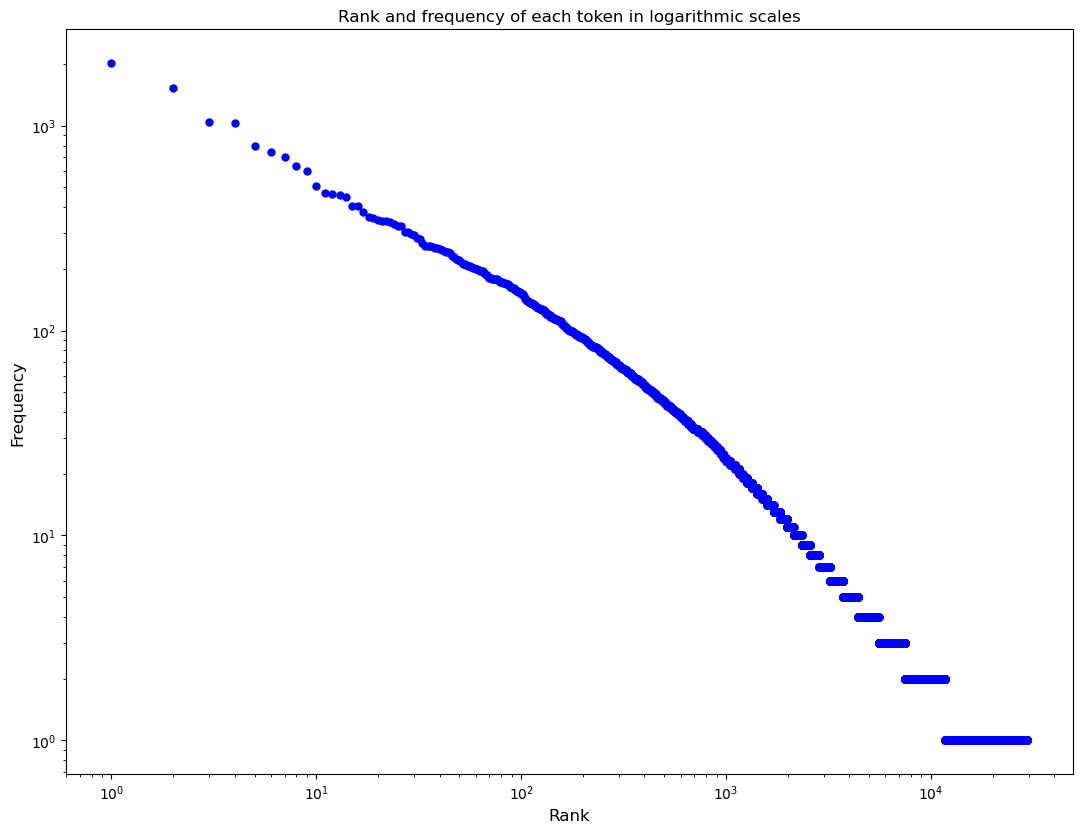

In [134]:
plt.figure(figsize=(13, 10))
ax = plt.axes()
plt.loglog(graph_df["Rank"], graph_df["Freq"], 'bo', markersize=5)
ax.set_title("Rank and frequency of each token in logarithmic scales", color='black', loc="center", fontsize=12)
ax.set_xlabel("Rank", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_aspect("equal")
plt.xticks(rotation=0)
plt.savefig("Graph.png", dpi=200)
plt.show()